# Training logs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Compare datasets
* 0-9: Fixed
* 10-19: `0_10_epox100_lr0.1_e99`

{'t_tuple': (0, 10), 'v_tuple': (10, 20), 'epochs': 100, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9}
Overfitting if T/V drawn from same distribution
However, that assumption is not correct
Final Imp Acc: 0.779


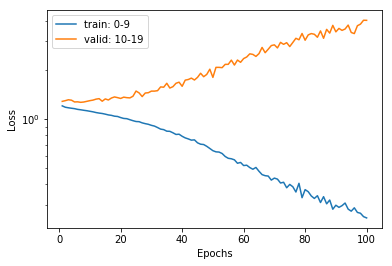

In [12]:
logs0 = np.load('0_10_epox100_lr0.1.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train: 0-9','valid: 10-19'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print('Final Imp Acc: {:.3f}'.format(np.exp(-1*t_loss0[-1])))

{'t_tuple': (10, 20), 'v_tuple': (0, 10), 'epochs': 100, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9}
Final Imp Acc: 0.706


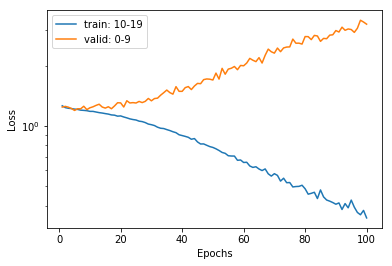

In [13]:
logs0 = np.load('10_20_epox100_lr0.1.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train: 10-19','valid: 0-9'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print('Final Imp Acc: {:.3f}'.format(np.exp(-1*t_loss0[-1])))

{'t_tuple': (0, 20), 'v_tuple': (0, 1), 'epochs': 100, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9}
Final Imp Acc: 0.553


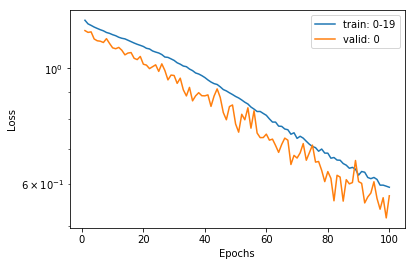

In [23]:
logs0 = np.load('0_20_epox100_lr0.1.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train: 0-19', 'valid: 0'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print('Final Imp Acc: {:.3f}'.format(np.exp(-1*t_loss0[-1])))

Based on validation losses, the models appear to be immediately overfitting. 
However these models are do get higher playing strength as shown in `compare_models`.
There is likely some overfitting going on.

The best solution is to generate more data.
At some point, the data will exceed the capacity of the network,
and the network will be forced to generalize.
This will be observed as the validation loss curve no longer going up quickly.

### Pretraining

{'t_tuple': (10, 20), 'v_tuple': (0, 10), 'epochs': 100, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9}
Final Imp Acc: 0.692
Pretrained seems to find an initial faster gradient region


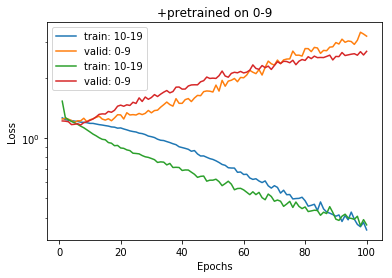

In [19]:
logs0 = np.load('10_20_epox100_lr0.1.npz')
logs1 = np.load('10_20_epox100_lr0.1pre.npz')
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1, epochs, v_loss1)
plt.legend(['train: 10-19','valid: 0-9', 'train: 10-19','valid: 0-9'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('+pretrained on 0-9')
plt.show()
print('Final Imp Acc: {:.3f}'.format(np.exp(-1*t_loss1[-1])))
print('Pretrained seems to find an initial faster gradient region')

{'t_tuple': (10, 20), 'v_tuple': (0, 10), 'epochs': 100, 'lr': 0.01, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9}
Final Imp Acc: 0.826
Lower LR preserves some accuracy on pretrainde validation set
Lower LR results in lower final loss, perhaps overfitting? 


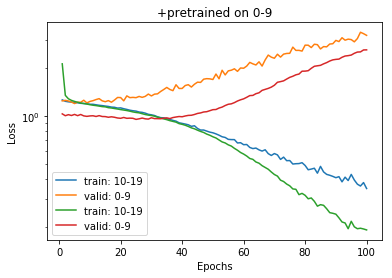

In [22]:
logs0 = np.load('10_20_epox100_lr0.1.npz')
logs1 = np.load('10_20_epox100_lr0.01pre.npz')
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1, epochs, v_loss1)
plt.legend(['train: 10-19','valid: 0-9', 'train: 10-19','valid: 0-9'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('+pretrained on 0-9')
plt.show()
print('Final Imp Acc: {:.3f}'.format(np.exp(-1*t_loss1[-1])))
print('Lower LR preserves some accuracy on pretrainde validation set')
print('Lower LR results in lower final loss, perhaps overfitting? ')

# New selfplay
Use fixed
original 10 different
remade 10

{'t_tuple': (5, 20), 'v_tuple': (0, 5), 'epochs': 100, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9, 'pretrained': None}


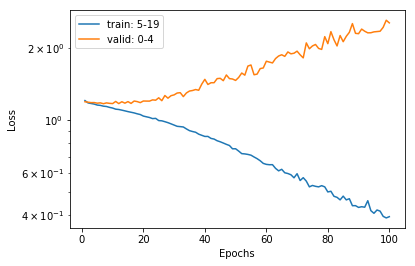

Final Imp Acc: 0.674


In [2]:
logs0 = np.load('20190607/5_20_epox100_lr0.1.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train: 5-19','valid: 0-4'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print('Final Imp Acc: {:.3f}'.format(np.exp(-1*t_loss0[-1])))

Still overfitting. Next try reducing capacity of network.

Current capacity maxes out at implied accuracy of 80-85% (plateau around 150 epochs).
Reduced capacity network `channels=8, num_blocks=4` maxes out around 40-45%.
If I reduce the capacity, the network does not have the ability to learn the complexities it needs to.
I also tried dividing input board by the maximum tile, but it did not affect this trend.
The next step is to collect more training data until overfitting stops happening.
Unfortunately, this may also bring the implied accuracy down.
I will continue to monitor playing strength.

## More Data
* Generate more training data using the best move order (currently Fixed is better than any NN)
* Increasing data slows down overfitting and improves validation accuracy.

{'t_tuple': (5, 20), 'v_tuple': (0, 5), 'epochs': 30, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9, 'pretrained': None}


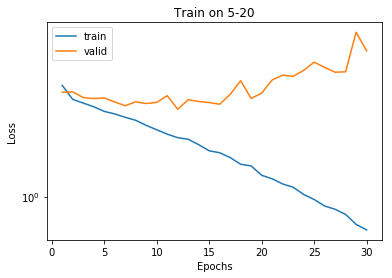

Plateau around 10. Model eval results mirror the validation curve


In [3]:
logs0 = np.load('20190610/5_20_epox30_lr0.1.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('Train on 5-20')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print('Plateau around 10. Model eval results mirror the validation curve')

{'t_tuple': (5, 30), 'v_tuple': (0, 5), 'epochs': 60, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9, 'pretrained': None}


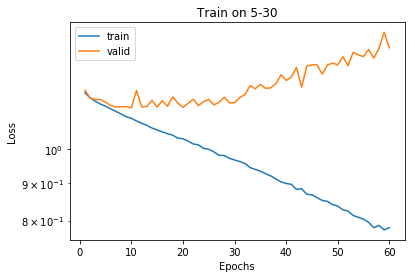

Validation curve stays plateau'd longer before increasing.


In [6]:
logs0 = np.load('20190610/5_30_epox60_lr0.1.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('Train on 5-30')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print("Validation curve stays plateau'd longer before increasing.")

{'t_tuple': (5, 30), 'v_tuple': (0, 5), 'epochs': 60, 'lr': 0.1, 'batch_size': 256, 'decay': 0.0001, 'momentum': 0.9, 'pretrained': None}


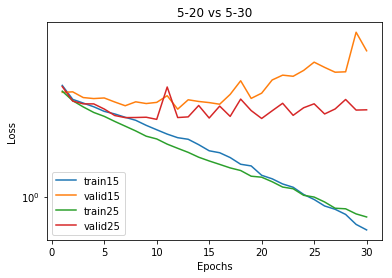

Having 25 vs 15 games gives a lower and longer-lasting validation curve


In [10]:
logs0 = np.load('20190610/5_20_epox30_lr0.1.npz')
logs1 = np.load('20190610/5_30_epox60_lr0.1.npz')
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = np.arange(1, len(t_loss0)+1)
plt.semilogy(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1[:30], epochs, v_loss1[:30])
plt.legend(['train15','valid15','train25','valid25'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('5-20 vs 5-30')
plt.show()
print('Having 25 vs 15 games gives a lower and longer-lasting validation curve')